# The Sparks Foundation

# Task-2: To Explore Unsupervised Machine Learning

**Author - Apurva Dabhadkar**

In [1]:
#loading libraries


# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu,chi2_contingency

# train test split
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

**Loading dataset**

In [2]:
# Load the iris dataset

df = pd.read_csv('Iris.csv')
df.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,2,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,3,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [3]:
#checking shape
df.shape

(150, 6)

In [4]:
#checking columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.drop(['Id'],axis=1,inplace=True)

In [6]:
#checking details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#chceking dtypes
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
#summary of numerical variables
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Summary of Catogerical variables
df.describe(include = ['object'])

,Species
count,150
unique,3
top,Iris-setosa
freq,50


**Seperating Numerical and Categorical columns**

In [10]:
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes(np.object)

In [11]:
d= df['Species'].value_counts()/len(df)*100
x = [[i,j] for i, j in list(zip(d.index,d))]

pd.DataFrame(x, columns = ['Species', '% of Observations'])

,Species,% of Observations
0,Iris-setosa,33.333333
1,Iris-versicolor,33.333333
2,Iris-virginica,33.333333


**Label Encoding**

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

**Univariate Analysis**

**Comparision of Petal Length and Petal width**

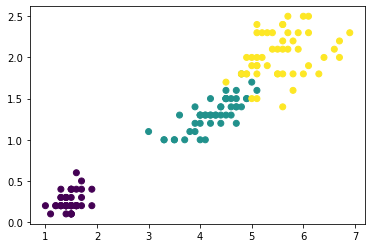

In [13]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],c=df.Species.values)
plt.show()

**Bivariate Analysis**

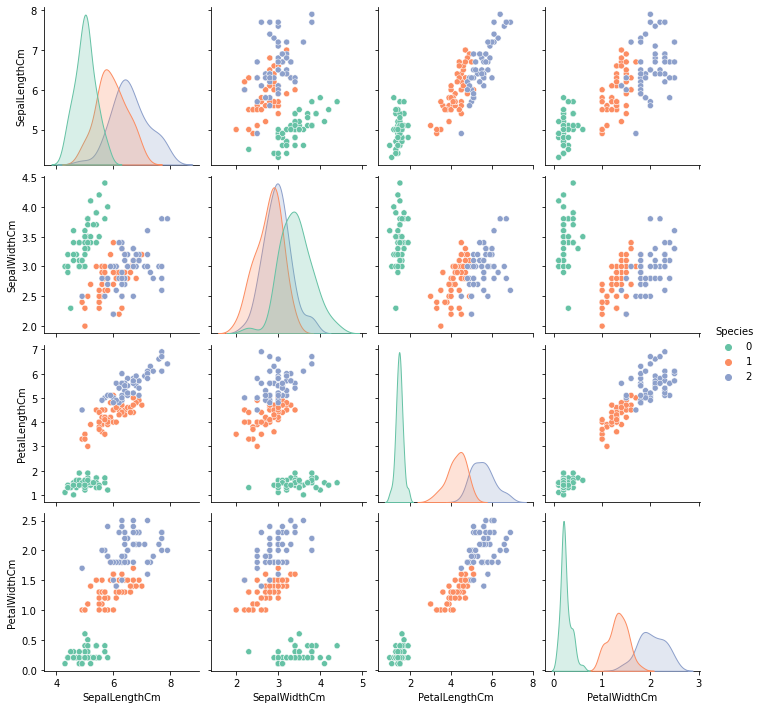

In [14]:
sns.pairplot(df,hue = 'Species',palette = 'Set2')
plt.show()

# **Checking for missing Values**

In [15]:
#checking Missing values
Total = df.isnull().sum().sort_values(ascending = False)

Percent = (df.isnull().sum()*100/ df.isnull().count()).sort_values(ascending = False)

#msissing data calulated by
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentages of missing values'])
missing_data

,Total,Percentages of missing values
SepalLengthCm,0,0.000000
SepalWidthCm,0,0.000000
PetalLengthCm,0,0.000000
PetalWidthCm,0,0.000000
Species,0,0.000000


# Checking for Outliers

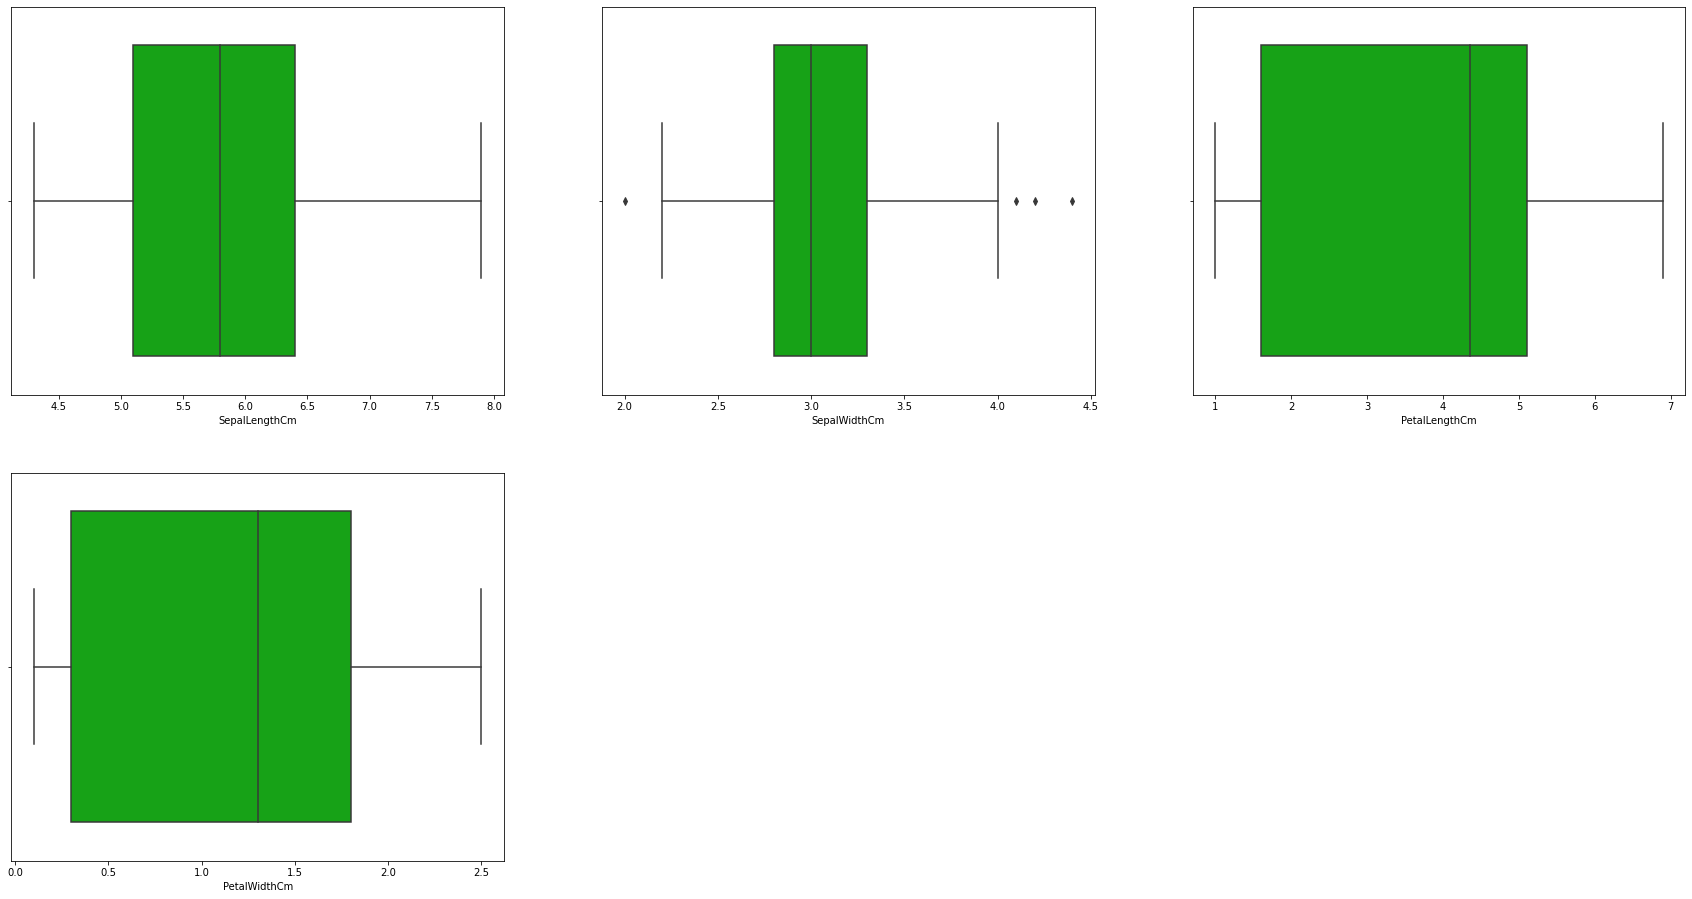

In [16]:
#defining fig size
plt.figure(figsize = (30, 50))
j = 1
for i in df_num:
    plt.subplot(6,3,j)
    sns.boxplot(df_num[i], palette = 'nipy_spectral_r')
    j = j+1
plt.show()

In [17]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

**Power Transformation**

In [18]:
df['SepalWidthCm']= np.cbrt(df['SepalWidthCm'])

<AxesSubplot:xlabel='SepalWidthCm'>

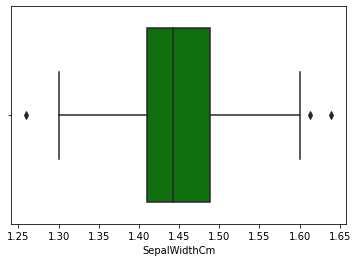

In [19]:
sns.boxplot(df['SepalWidthCm'], color = 'green')

In [20]:
df.shape

(150, 5)

# HEATMAP ANALYSIS

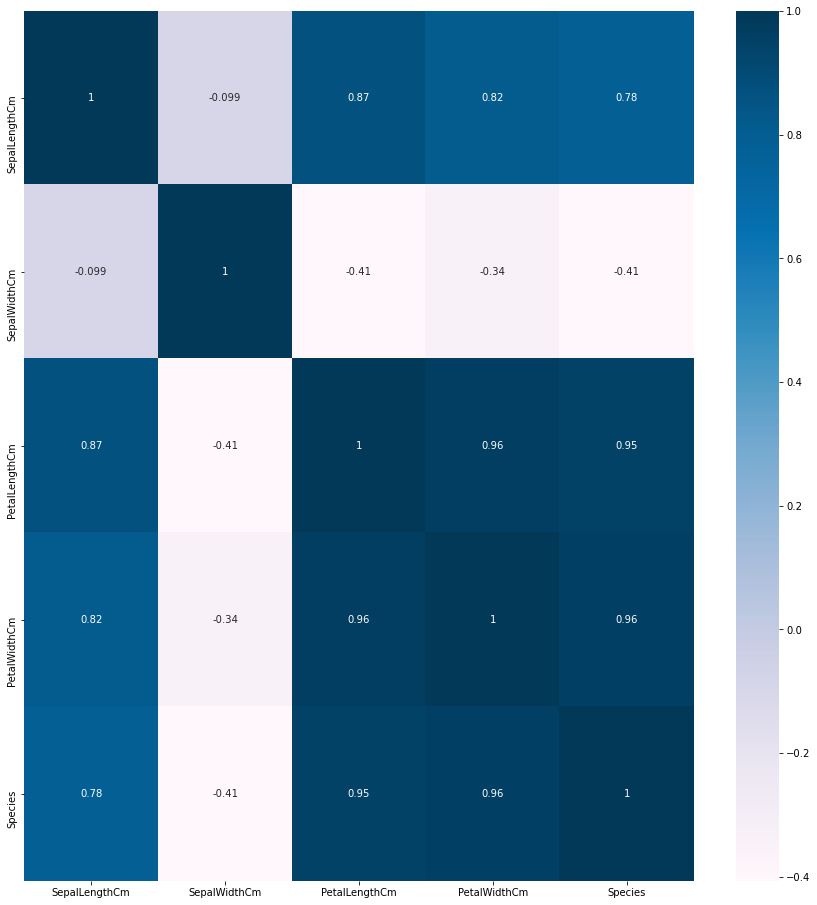

In [21]:
plt.figure(figsize = (15,16))
ax = sns.heatmap(df.corr(), annot = True, cmap = 'PuBu')
plt.show()

We can see that Species is mainly depend on Petal Length and Petal Width.

using petal_length and petal_width

# K-Means Clustering

In [ ]:
X=df.iloc[:,[0,1,2,3]].values

# Optimal Value of K Using Elbow Plot

In [23]:
# create several cluster combinations ranging from 1 to 20 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0) 
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

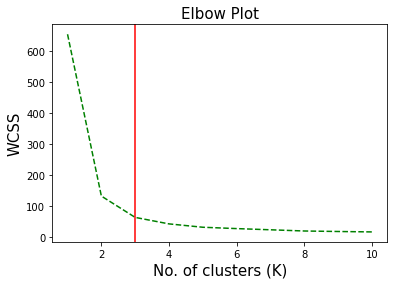

In [24]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,11), wcss,color = 'green', linestyle = '--')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# plot a vertical line at the elbow
plt.axvline(x = 3, color = 'red')


# display the plot
plt.show()

# Interpretation:
We can see that the for K = 3, there is an elbow in the plot. Before this elbow point, the WCSS is decreasing rapidly and after K = 3, the WCSS is decreasing slowly.

Now, let us use the silhouette score method to identify the optimal value of K.

In [25]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

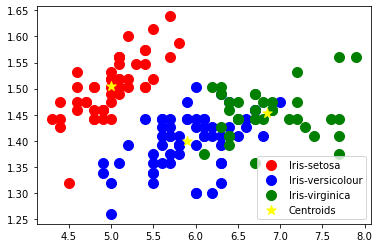

In [31]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids',marker = '*')

plt.legend()
plt.show()